# Penguin Species Clustering Analysis

## Introduction
This notebook demonstrates the process of clustering penguin species using k-means clustering. The data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The dataset consists of measurements of culmen length, culmen depth, flipper length, body mass, and the sex of the penguins.

## Dataset
The dataset consists of the following columns:
- **culmen_length_mm**: Culmen length (mm)
- **culmen_depth_mm**: Culmen depth (mm)
- **flipper_length_mm**: Flipper length (mm)
- **body_mass_g**: Body mass (g)
- **sex**: Penguin sex

## Data Loading and Preprocessing
First, we load the dataset and handle any missing values by dropping rows with missing data.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'penguins.csv'
penguins = pd.read_csv(file_path)
print(penguins.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


In [4]:
# drop rows with missing values to ensure the efficiency of the model
penguins_cleaned = penguins.dropna()


## Feature Selection
We select the relevant features for clustering:
- culmen_length_mm
- culmen_depth_mm
- flipper_length_mm
- body_mass_g

In [5]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_cleaned[features]


## Data Standardization
We standardize the features to ensure they are on the same scale.


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Optimal Number of Clusters
We use the elbow method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different numbers of clusters.


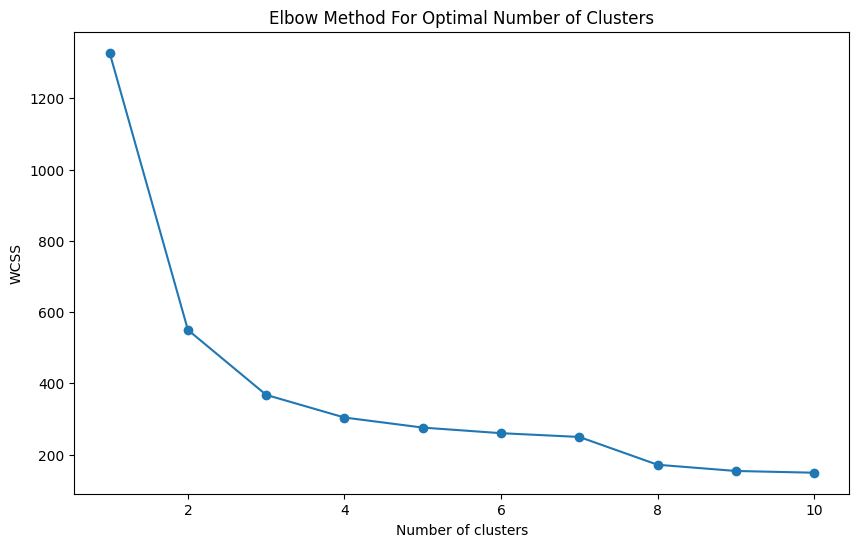

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering
Based on the elbow method, we select 3 clusters and perform k-means clustering.

In [8]:
# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

## Visualization of Clusters
We visualize the clusters using a scatter plot of culmen length vs. culmen depth, colored by cluster.

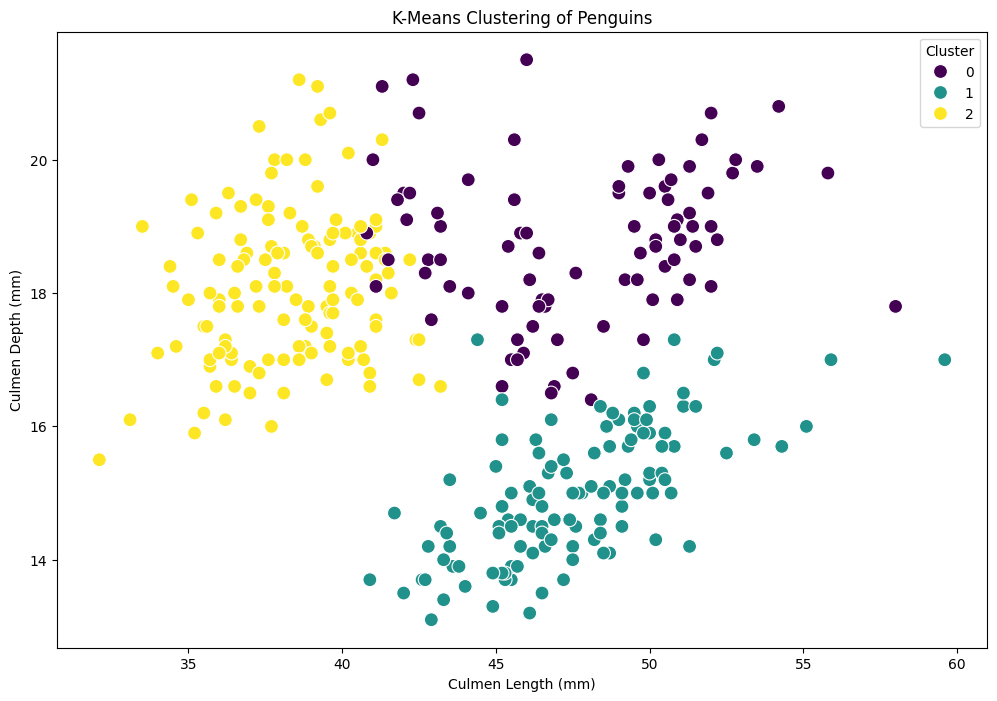

In [9]:
import seaborn as sns

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=penguins_cleaned, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Penguins')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Cluster')
plt.show()

## Cluster Centers
Finally, we display the cluster centers to understand the characteristics of each cluster.

In [10]:
# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,47.662353,18.748235,196.917647,3898.235294
1,47.568067,14.996639,217.235294,5092.436975
2,38.305469,18.098437,188.554688,3587.500000


## Conclusion
The k-means clustering has identified three distinct groups in the penguin dataset, which likely correspond to the three species of penguins (Adelie, Chinstrap, and Gentoo). The cluster centers provide insights into the characteristics of each group.